## Interface properties

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [28]:
c_1L = 6300.0 #Medium 1 longitudinal velocity - Aluminum
c_1T = 3100.0 #Medium 1 transverse velocity

c_2L = 2670.0  #Medium 2 longitudinal velocity - plexiglass
c_2T = 1120.0  #Medium 2 longitudinal velocity

c_N = c_1L # Wave velocity of the incident wave. Can be either c_1L or c1_T
#c_N = c_1T

rho_1 = 2.65 * 1000
rho_2 = 1.18 * 1000

poisson_1 = 0.32
poisson_2 = 0.37

In [ ]:
c_1L = 2670.0  #Medium 1 longitudinal velocity - plexiglass
c_1T = 1120.0  #Medium 1 longitudinal velocity

c_2L = 5850.0 #Steel
c_2T = 3230.0

c_N = c_1L # Wave velocity of the incident wave. Can be either c_1L or c1_T

rho_1 = 1.18 * 1000 # densities in kg/m^3
rho_2 = 7.8 * 1000

poisson_1 = 0.37
poisson_2 = 0.30

In [30]:
if c_N == c_1L:
    in_mode = 'Longitudinal'
if c_N == c_1T:
    in_mode = 'Transverse'

In [31]:
# incoming angles
angles = np.linspace(0, np.pi/2, 91)

In [32]:
np.rad2deg(angles)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.])

## Snell's law

In [33]:
#Critical angle:
if c_N < c_2L:
    print('First critical angle exists')
    crit_angle_1 = np.arcsin(c_N/c_2L)
    print(np.rad2deg(crit_angle_1))
else:
    crit_angle_1 = False
if c_N < c_2T:
    print('Second critical angle exists')
    crit_angle_2 = np.arcsin(c_N/c_2T)
    print(np.rad2deg(crit_angle_2))
else:
    crit_angle_2 = False

In [34]:
aT = (c_1T/c_N) * np.sin(angles)
aL = (c_1L/c_N) * np.sin(angles)
bT = (c_2T/c_N) * np.sin(angles)
bL = (c_2L/c_N) * np.sin(angles)
aT = [x if x < 1 else 1 for x in aT]
aL = [x if x < 1 else 1 for x in aL]
bT = [x if x < 1 else 1 for x in bT]
bL = [x if x < 1 else 1 for x in bL]
alpha_T = np.arcsin(aT)
alpha_L = np.arcsin(aL)
beta_T = np.arcsin(bT)
beta_L = np.arcsin(bL)

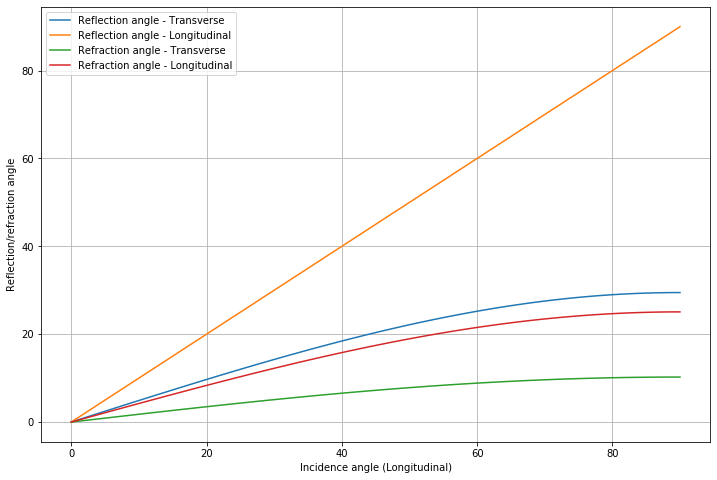

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(np.rad2deg(angles), np.rad2deg(alpha_T), label='Reflection angle - Transverse')
plt.plot(np.rad2deg(angles), np.rad2deg(alpha_L), label='Reflection angle - Longitudinal')
plt.plot(np.rad2deg(angles), np.rad2deg(beta_T), label='Refraction angle - Transverse')
plt.plot(np.rad2deg(angles), np.rad2deg(beta_L), label='Refraction angle - Longitudinal')
plt.grid()
plt.legend()
plt.xlabel('Incidence angle (' + in_mode +')')
plt.ylabel('Reflection/refraction angle')
if crit_angle_1:
    plt.vlines(np.rad2deg(crit_angle_1), 0, 90, linestyles='dotted')
if crit_angle_2:
    plt.vlines(np.rad2deg(crit_angle_2), 0, 90, linestyles='dotted')
plt.show()

In [36]:
idx = 60
angle_coords = (-np.sin(angles[idx]), np.cos(angles[idx]))
alpha_T_coords = (np.sin(alpha_T[idx]), np.cos(alpha_T[idx]))
alpha_L_coords = (np.sin(alpha_L[idx]), np.cos(alpha_L[idx]))
beta_T_coords = (np.sin(beta_T[idx]), -np.cos(beta_T[idx]))
beta_L_coords = (np.sin(beta_L[idx]), -np.cos(beta_L[idx]))

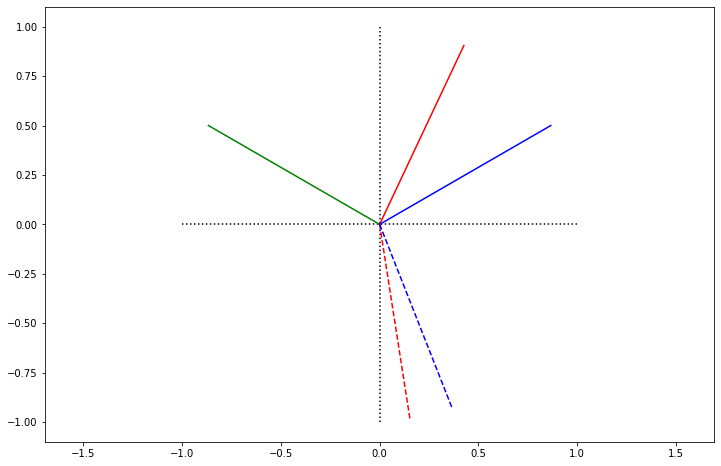

In [37]:
plt.figure(figsize=(12, 8))
plt.hlines(0, -1, 1, linestyles='dotted')
plt.vlines(0, -1, 1, linestyles='dotted')
plt.plot([angle_coords[0], 0], [angle_coords[1], 0], 'g-')
plt.plot([0, alpha_T_coords[0]], [0, alpha_T_coords[1]], 'r-' )
plt.plot([0, alpha_L_coords[0]], [0, alpha_L_coords[1]], 'b-')
plt.plot([0, beta_T_coords[0]], [0, beta_T_coords[1]], 'r--')
plt.plot([0, beta_L_coords[0]], [0, beta_L_coords[1]], 'b--')
plt.axis('equal')

plt.show()

In [38]:
def f(idx):
    angle_coords = (-np.sin(angles[idx]), np.cos(angles[idx]))
    alpha_T_coords = (np.sin(alpha_T[idx]), np.cos(alpha_T[idx]))
    alpha_L_coords = (np.sin(alpha_L[idx]), np.cos(alpha_L[idx]))
    beta_T_coords = (np.sin(beta_T[idx]), -np.cos(beta_T[idx]))
    beta_L_coords = (np.sin(beta_L[idx]), -np.cos(beta_L[idx]))
    
    plt.figure(figsize=(12, 8))
    plt.hlines(0, -1, 1, linestyles='dotted')
    plt.vlines(0, -1, 1, linestyles='dotted')
    plt.plot([angle_coords[0], 0], [angle_coords[1], 0], 'g-', label='Incoming ' + in_mode)
    plt.plot([0, alpha_T_coords[0]], [0, alpha_T_coords[1]], 'r-', label='Reflected Transverse' )
    plt.plot([0, alpha_L_coords[0]], [0, alpha_L_coords[1]], 'b-', label='Reflected Longitudinal')
    plt.plot([0, beta_T_coords[0]], [0, beta_T_coords[1]], 'r--', label='Refracted Transverse')
    plt.plot([0, beta_L_coords[0]], [0, beta_L_coords[1]], 'b--', label='Refracted Longitudinal')
    plt.legend()
    plt.axis('equal')

    plt.show()

In [39]:
%matplotlib inline
from ipywidgets import interactive

In [40]:
interactive_plot = interactive(f, idx=(0, 90))

In [41]:
interactive_plot

interactive(children=(IntSlider(value=45, description='idx', max=90), Output()), _dom_classes=('widget-interac…

## Slowness Profiles

In [42]:
s_1L = 1/c_1L
s_1T = 1/c_1T
s_2L = 1/c_2L
s_2T = 1/c_2T
s_N = 1/c_N

In [43]:
s_2T

0.0008928571428571428

In [44]:
s_Nx, s_Ny = -s_N*np.sin(angles), s_N*np.cos(angles)
s_1Lx, s_1Ly = s_1L*np.sin(angles), s_1L*np.cos(angles)
s_1Tx, s_1Ty = s_1T*np.sin(angles), s_1T*np.cos(angles)
s_2Lx, s_2Ly = s_2L*np.sin(angles), -s_2L*np.cos(angles)
s_2Tx, s_2Ty = s_2T*np.sin(angles), -s_2T*np.cos(angles)

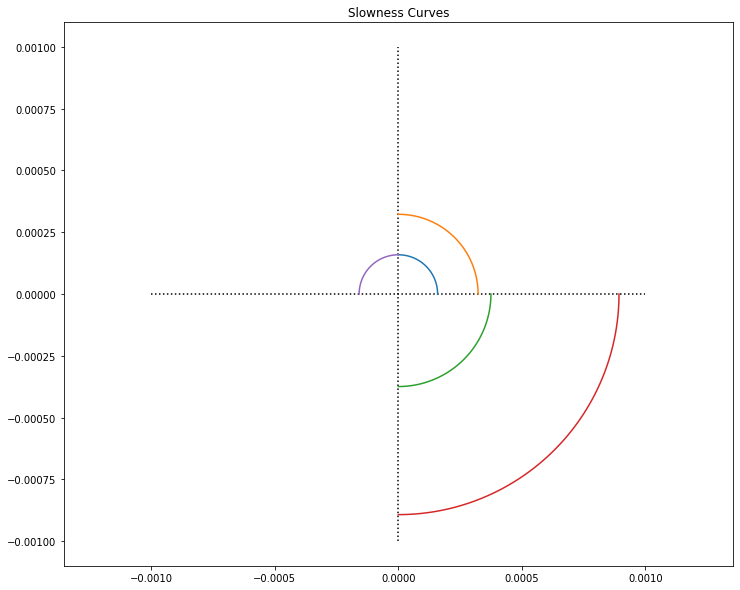

In [45]:
plt.figure(figsize=(12, 10))
plt.hlines(0, -0.001, 0.001, linestyles='dotted')
plt.vlines(0, -0.001, 0.001, linestyles='dotted')
plt.plot(s_1Lx, s_1Ly)
plt.plot(s_1Tx, s_1Ty)
plt.plot(s_2Lx, s_2Ly)
plt.plot(s_2Tx, s_2Ty)
plt.plot(s_Nx, s_Ny)
plt.title('Slowness Curves')

plt.axis('equal')
plt.show()

In [46]:
def f_slow(idx):
    xmax = max([max(s_1Lx), max(s_1Tx), max(s_2Lx), max(s_2Tx), max(s_Nx)])
    ymax = max([max(s_1Ly), max(s_1Ty), max(s_2Ly), max(s_2Ty), max(s_Ny)])
    angle_coords = tuple(s_N*np.array([-np.sin(angles[idx]), np.cos(angles[idx])]))
    alpha_T_coords = tuple(s_1T*np.array([np.sin(alpha_T[idx]), np.cos(alpha_T[idx])]))
    alpha_L_coords = tuple(s_1L*np.array([np.sin(alpha_L[idx]), np.cos(alpha_L[idx])]))
    beta_T_coords = tuple(s_2T*np.array([np.sin(beta_T[idx]), -np.cos(beta_T[idx])]))
    beta_L_coords = tuple(s_2L*np.array([np.sin(beta_L[idx]), -np.cos(beta_L[idx])]))
    k = -angle_coords[0]
    
    plt.figure(figsize=(12, 8))
    plt.vlines(0, -1.1*ymax, 1.1*ymax, linestyles='dotted')
    plt.hlines(0, -1.1*xmax, 1.1*xmax, linestyles='dotted')
    #plt.hlines(0, linestyles='dotted')
    #plt.vlines(0, linestyles='dotted')
    plt.vlines(k, -1.1*ymax, 1.1*ymax, linestyles='dashed')
    plt.plot(s_1Lx, s_1Ly, 'b')
    plt.plot(s_1Tx, s_1Ty, 'r')
    plt.plot(s_2Lx, s_2Ly, 'b')
    plt.plot(s_2Tx, s_2Ty, 'r')
    plt.plot(s_Nx, s_Ny, 'g')

    plt.plot([angle_coords[0], 0], [angle_coords[1], 0], 'g-', label='Incoming ' + in_mode)
    plt.plot([0, alpha_T_coords[0]], [0, alpha_T_coords[1]], 'r-', label='Reflected Transverse' )
    plt.plot([0, alpha_L_coords[0]], [0, alpha_L_coords[1]], 'b-', label='Reflected Longitudinal')
    plt.plot([0, beta_T_coords[0]], [0, beta_T_coords[1]], 'r--', label='Refracted Transverse')
    plt.plot([0, beta_L_coords[0]], [0, beta_L_coords[1]], 'b--', label='Refracted Longitudinal')
    plt.legend()
    plt.axis('equal')
    plt.xlabel('kx - wavenumber x-component')
    plt.ylabel('kz - wavenumber z-component')

    plt.show()
    

In [47]:
%matplotlib inline

In [48]:
interactive_plot2 = interactive(f_slow, idx=(0, 90))
interactive_plot2

interactive(children=(IntSlider(value=45, description='idx', max=90), Output()), _dom_classes=('widget-interac…

## Reflection and Refraction Factors

In [49]:
k_1L = 1/c_1L
k_1T = 1/c_1T
k_2L = 1/c_2L
k_2T = 1/c_2T
mu_1 = c_1T * c_1T * rho_1
mu_2 = c_2T * c_2T * rho_2
lam_1 = (2*mu_1*poisson_1) / (1-2*poisson_1)
lam_2 = (2*mu_2*poisson_2) / (1-2*poisson_2)

In [50]:
lam_1

45273777777.77778

In [51]:
RL = np.zeros(len(angles)) 
RT = np.zeros(len(angles))
SL = np.zeros(len(angles))
ST = np.zeros(len(angles))



for idx in range(len(angles)):
    M = np.array([
        [-np.cos(alpha_L[idx]), np.sin(alpha_T[idx]), -np.cos(beta_L[idx]), np.sin(beta_T[idx])],
        [-np.sin(alpha_L[idx]), np.cos(alpha_T[idx]), np.sin(beta_L[idx]), np.cos(beta_T[idx])],
        [-k_1L*(lam_1 + 2*mu_1)*np.cos(2*alpha_T[idx]), k_1T*mu_1*np.sin(2*alpha_T[idx]), k_2L*(lam_2 + 2*mu_2)*np.cos(2*beta_T[idx]), -k_2T*mu_2*np.sin(2*beta_T[idx])],
        [-k_1L*mu_1*np.sin(2*alpha_L[idx]), -k_1T*mu_1*np.cos(2*alpha_T[idx]), -k_2L*mu_2*np.sin(2*beta_L[idx]), -k_2T*mu_2*np.cos(2*beta_T[idx])]
        ])
    a_T = np.array([
        [np.sin(alpha_T[idx])],
        [np.cos(alpha_T[idx])],
        [-k_1T*mu_1*np.sin(2*alpha_T[idx])],
        [-k_1T*mu_1*np.cos(2*alpha_T[idx])]
        ])
    a_L = np.array([
        [-np.cos(alpha_L[idx])],
        [np.sin(alpha_L[idx])],
        [k_1L*(lam_1 + 2*mu_1)*np.cos(2*alpha_T[idx])],
        [-k_1L*mu_1*np.sin(2*alpha_L[idx])]
        ])
    if in_mode == 'Longitudinal':
        x = np.linalg.solve(M, a_L)
        #print('Solved for Longitudinal incident wave')
    if in_mode == 'Transverse':
        x = np.linalg.solve(M, a_T)
        #print('Solved for Transverse incident wave')
    RL[idx] = np.abs(x[0])
    RT[idx] = np.abs(x[1])
    SL[idx] = np.abs(x[2])
    ST[idx] = np.abs(x[3])
    

In [52]:
in_mode

'Longitudinal'

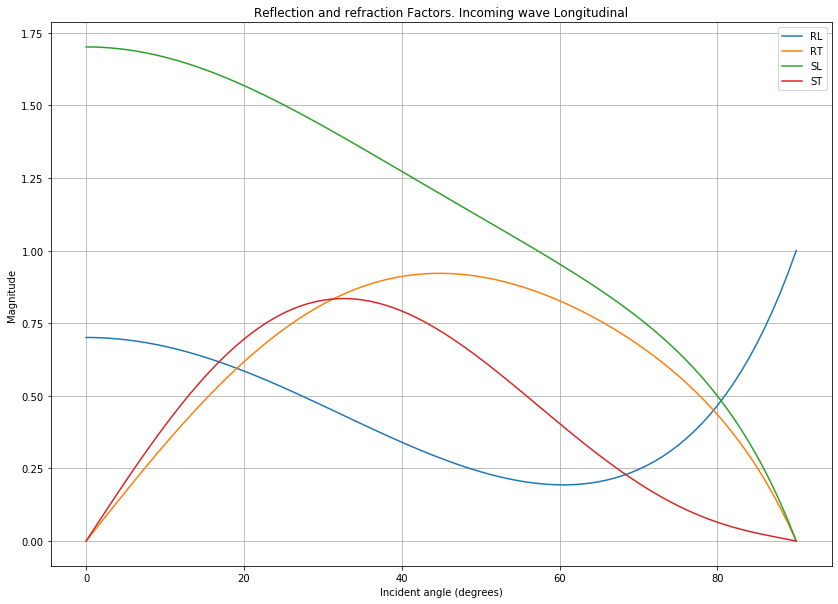

In [56]:
plt.figure(figsize=(14, 10))
plt.plot(np.rad2deg(angles), RL, label='RL')
plt.plot(np.rad2deg(angles), RT, label='RT')
plt.plot(np.rad2deg(angles), SL, label='SL')
plt.plot(np.rad2deg(angles), ST, label='ST')
plt.legend()
plt.title('Reflection and refraction Factors. Incoming wave ' + in_mode)
plt.xlabel('Incident angle (degrees)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()